In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
covid=pd.read_csv('COVID.csv')
covid.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


In [3]:
covid['Date']=pd.to_datetime(covid['Date'])
covid['Date']=covid['Date'].map(lambda  Date: 100*Date.year + Date.month)
covid.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,202001,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,202001,Albania,0,0,0.0,0.0,0,0,0
2,2,202001,Algeria,0,0,0.0,0.0,0,0,0
3,3,202001,Andorra,0,0,0.0,0.0,0,0,0
4,4,202001,Angola,0,0,0.0,0.0,0,0,0


In [4]:
country=covid.query("Date==202004")
country

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
13510,13510,202004,Afghanistan,197,4,5.0,188.0,22,0,0
13511,13511,202004,Albania,259,15,67.0,177.0,16,0,15
13512,13512,202004,Algeria,847,58,61.0,728.0,131,14,15
13513,13513,202004,Andorra,390,14,10.0,366.0,14,2,0
13514,13514,202004,Angola,8,2,1.0,5.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
19295,19295,202004,Vietnam,270,0,219.0,51.0,0,0,-3
19296,19296,202004,West Bank and Gaza,344,2,76.0,266.0,0,0,5
19297,19297,202004,Yemen,6,2,1.0,3.0,0,2,1
19298,19298,202004,Zambia,106,3,55.0,48.0,9,0,1


In [5]:
country=country.groupby(['Country/Region'])['Confirmed'].sum().reset_index()
country

,Country/Region,Confirmed
0,Afghanistan,27074
1,Albania,15632
2,Algeria,69497
3,Andorra,19106
4,Angola,601
...,...,...
188,Vietnam,7778
189,West Bank and Gaza,8597
190,Yemen,31
191,Zambia,1754


In [6]:
country=country.sort_values(['Confirmed'],ascending=False).reset_index()
country.head(8)

,index,Country/Region,Confirmed
0,179,US,19960815
1,162,Spain,5236777
2,84,Italy,4928524
3,65,Germany,3942925
4,61,France,3456319
5,183,United Kingdom,3328344
6,36,China,2500143
7,80,Iran,2255837


In [17]:
iran=covid.loc[covid['Country/Region']=="Iran"]
iran.head(500)


,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
80,80,202001,Iran,0,0,0.0,0.0,0,0,0
273,273,202001,Iran,0,0,0.0,0.0,0,0,0
466,466,202001,Iran,0,0,0.0,0.0,0,0,0
659,659,202001,Iran,0,0,0.0,0.0,0,0,0
852,852,202001,Iran,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
95615,95615,202105,Iran,2913136,80156,2458684.0,374296.0,11042,217,17156
95808,95808,202106,Iran,2923823,80327,2477596.0,365900.0,10687,171,18912
96001,96001,202106,Iran,2935443,80488,2494108.0,360847.0,11620,161,16512
96194,96194,202106,Iran,2945100,80658,2508907.0,355535.0,9657,170,14799


Text(0.5, 0.98, 'Information Of Iran')

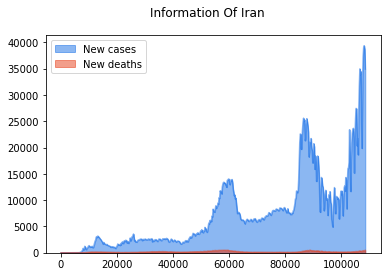

In [22]:
iran[['New cases', 'New deaths']].plot(kind="area", legend=True, stacked=False, color=['#1970E7', '#E73E19'])
plt.suptitle('Information Of Iran')